Using TensorFlow backend.


<class 'pandas.core.frame.DataFrame'>


C:\Users\cgm74\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cgm74\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cgm74\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

(2650, 21)
(683, 21)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               2520      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2440      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 

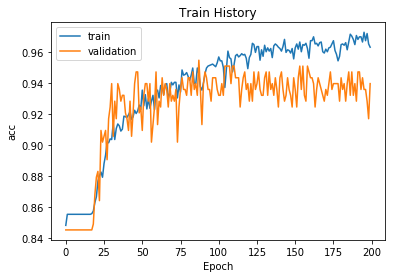

 32/683 [>.............................] - ETA: 0s0.918008785209
<class 'pandas.core.frame.DataFrame'>
(12, 21)
12/12 [==============================] - 0s
[0 0 0 0 0 1 1 1 1 1 1 1]
[ True  True  True False False  True  True  True  True  True  True  True]


ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

def show_train_history(trainHistory, train, validation):
    plt.plot(trainHistory.history[train])
    plt.plot(trainHistory.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def load_dataframe_from_csv(filename):
    csvReader = pd.read_csv(filename)
    print(type(csvReader))
    return csvReader

def preprocess_data(customerData):
    customerData['Churn?'] = customerData['Churn?'].astype('category').cat.codes
    customerData['State'] = customerData['State'].astype('category').cat.codes
    customerData["Int'l Plan"] = customerData["Int'l Plan"].astype('category').cat.codes
    customerData['VMail Plan'] = customerData['VMail Plan'].astype('category').cat.codes
    customerData['Phone'] = customerData['Phone'].astype('category').cat.codes
    #print(customerData.head())
    #print(customerData.info)
    ndarray = customerData.values
    print(ndarray.shape)
    features = ndarray[:, 0:-1]
    label = ndarray[:, -1]
    cateLabel = np_utils.to_categorical(label)
    min_max_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = min_max_scale.fit_transform(features)
    
    return scaledFeatures, cateLabel


customerData = load_dataframe_from_csv("churn.txt")
mask = np.random.rand(len(customerData)) < 0.8
trainDf = customerData[mask]
testDf = customerData[~mask]
trainingFeatures, trainingLabel = preprocess_data(trainDf)
testFeatures, testLabel = preprocess_data(testDf)

#print('total:', len(customerData),
#      'train:', len(trainDf),
#      'test:', len(testDf))

model = Sequential()
model.add(Dense(units=120, input_dim=len(customerData.columns)-1, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=60, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2, kernel_initializer='normal', activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trainHistory = model.fit(x=trainingFeatures, y=trainingLabel, validation_split=0.1, epochs=200, batch_size=100, verbose=2)
show_train_history(trainHistory, 'acc', 'val_acc')

scores = model.evaluate(x=testFeatures, y=testLabel)
print(scores[1])

testData = load_dataframe_from_csv("test_data.txt")
testFeatures2, testLabel2 = preprocess_data(testData)
#scores = model.evaluate(x=testFeatures2, y=testLabel2)
#print(scores[1])
predictResult = model.predict_classes(testFeatures2);
print(predictResult)
print(np.array(predictResult) == np.array(pd.Series.tolist(testData['Churn?'].astype('category').cat.codes)))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

